In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import AllChem

####3.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树

In [2]:
df_t = pd.read_csv('train.csv')
X_t = [Chem.MolFromSmiles(smiles) for smiles in df_t['Smiles']]
y_t = df_t['Standard Value'].values

X_ecfp_t = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in X_t]

In [3]:
df_v = pd.read_csv('val.csv')
X_v = [Chem.MolFromSmiles(smiles) for smiles in df_v['Smiles']]
y_v = df_v['Standard Value'].values

X_ecfp_v = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in X_v]

In [4]:
def try_different_method(model):
    model.fit(X_ecfp_t,y_t)
    score = model.score(X_ecfp_v, y_v)
    result = model.predict(X_ecfp_v)
    plt.figure()
    plt.plot(np.arange(len(result)), y_v,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

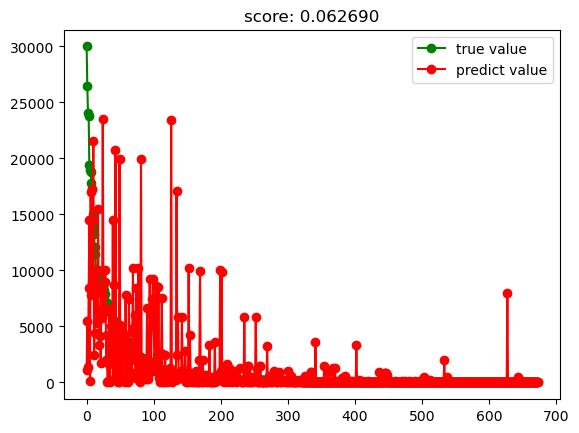

In [5]:
try_different_method(model_DecisionTreeRegressor)

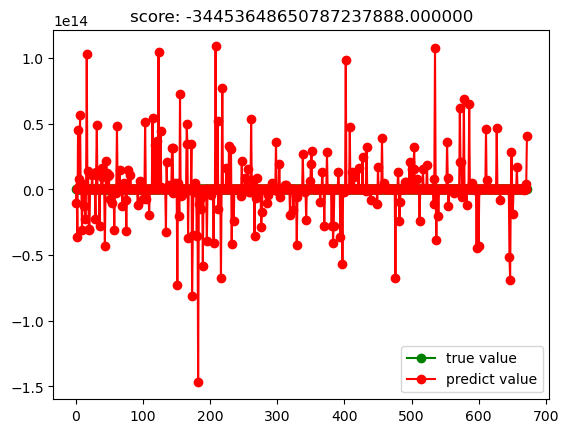

In [6]:
try_different_method(model_LinearRegression)

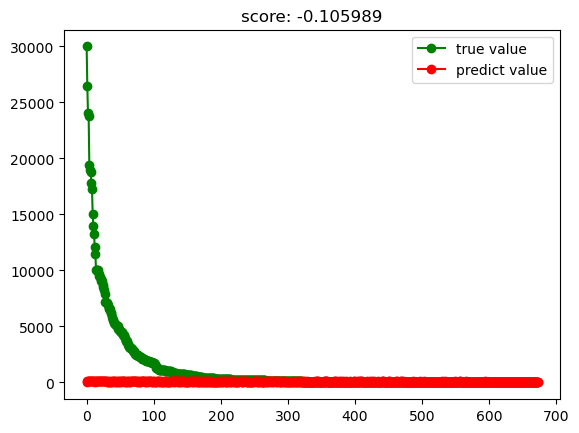

In [7]:
try_different_method(model_SVR)

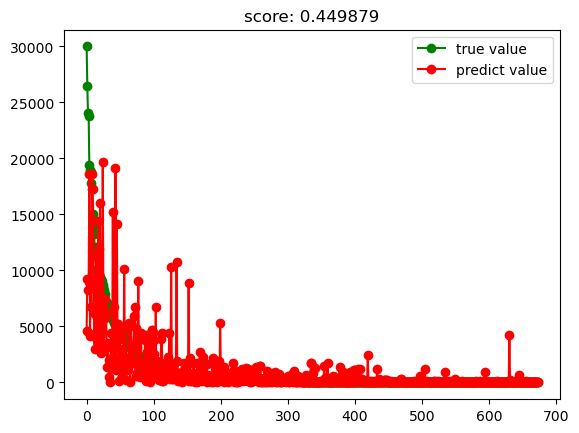

In [8]:
try_different_method(model_KNeighborsRegressor)

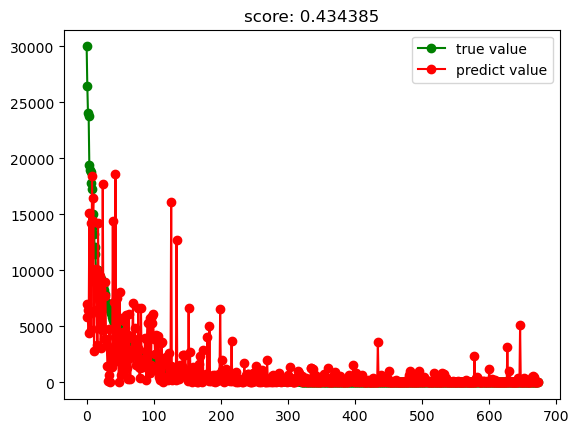

In [9]:
try_different_method(model_RandomForestRegressor)